#**Import Library**

In [ ]:
%autosave 5

Autosaving every 5 seconds


In [ ]:
!pip install mord

  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9885 sha256=5c1f476f009332b11a90c5c11e8f642a71c1b25579292162526ff3cb5b8f6788
  Stored in directory: /root/.cache/pip/wheels/d1/fc/57/f2a2ad4ed0491ab6d5bb8642a90f1da9469397641e914743da
Successfully built mord


In [ ]:
# Manipulasi & Visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocessing Data
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn import preprocessing
from scipy.stats.mstats import winsorize

# Split Dataset
from sklearn.model_selection import train_test_split

# Build Model
import statsmodels.api as sm
from scipy import stats
from statsmodels.miscmodels.ordinal_model import OrderedModel
from mord import OrdinalRidge, LogisticIT, LogisticAT, LogisticSE
from sklearn.utils import resample

# Evaluasi Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error

#**Memuat Dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/SEMESTER_2/Permodelan_Statistik/projectAkhir/dataset/Data Indeks Standar Pencemar Udara (ISPU) di Provinsi DKI Jakarta.csv')

##**Merubah Nama Kolom (optional)**

In [ ]:
data.rename(columns={'periode_data': 'tahun', 'tanggal': 'hari','pm_sepuluh':'PM10','pm_duakomalima':'PM25', 'sulfur_dioksida':'SO2', 'karbon_monoksida':'CO','ozon':'O3','nitrogen_dioksida':'NO2','parameter_pencemar_kritis':'critical', 'kategori':'categori'}, inplace=True)

In [ ]:
data.head(10)

tahun  bulan  hari         stasiun  PM10  PM25   SO2    CO    O3   NO2  \
0   2024      1    21  DKI3 Jagakarsa  51.0  65.0  45.0   9.0   8.0  79.0   
1   2024      1    22  DKI3 Jagakarsa  27.0  34.0  45.0   5.0   8.0  56.0   
2   2024      1    23  DKI3 Jagakarsa   NaN  52.0  46.0   6.0   9.0  51.0   
3   2024      1    24  DKI3 Jagakarsa  46.0  65.0  46.0   8.0   9.0  38.0   
4   2024      1    25  DKI3 Jagakarsa  37.0  55.0  47.0   7.0  11.0  28.0   
5   2024      1    26  DKI3 Jagakarsa  43.0  62.0  50.0   7.0  15.0  14.0   
6   2024      1    27  DKI3 Jagakarsa  40.0  52.0  48.0   8.0  12.0  10.0   
7   2024      1    28  DKI3 Jagakarsa  40.0  62.0  48.0  12.0  12.0  18.0   
8   2024      1    29  DKI3 Jagakarsa  33.0  44.0  47.0  14.0  12.0  24.0   
9   2024      1    30  DKI3 Jagakarsa  58.0  46.0  48.0  22.0  12.0  33.0   

    max critical categori  
0  79.0      NO2   SEDANG  
1  56.0      NO2   SEDANG  
2  52.0     PM25   SEDANG  
3  65.0     PM25   SEDANG  
4  55.0     PM25   SEDANG  
5  62.0     PM25   SEDANG  
6  52.0     PM25   SEDANG  
7  62.0     PM25   SEDANG  
8  47.0      SO2     BAIK  
9  58.0     PM10   SEDANG

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tahun     2280 non-null   int64  
 1   bulan     2280 non-null   int64  
 2   hari      2280 non-null   int64  
 3   stasiun   2280 non-null   object 
 4   PM10      2147 non-null   float64
 5   PM25      2249 non-null   float64
 6   SO2       2245 non-null   float64
 7   CO        2246 non-null   float64
 8   O3        2251 non-null   float64
 9   NO2       2227 non-null   float64
 10  max       2275 non-null   float64
 11  critical  2232 non-null   object 
 12  categori  2280 non-null   object 
dtypes: float64(7), int64(3), object(3)
memory usage: 231.7+ KB


In [ ]:
data.describe()

tahun        bulan         hari         PM10         PM25  \
count  2280.000000  2280.000000  2280.000000  2147.000000  2249.000000   
mean   2024.189912     5.622807    15.712719    48.746157    67.927523   
std       0.392318     3.595718     8.794291    16.992853    23.601952   
min    2024.000000     1.000000     1.000000     5.000000    10.000000   
25%    2024.000000     2.000000     8.000000    36.000000    53.000000   
50%    2024.000000     5.000000    16.000000    51.000000    69.000000   
75%    2024.000000     9.000000    23.000000    60.000000    85.000000   
max    2025.000000    12.000000    31.000000   187.000000   157.000000   

               SO2           CO           O3          NO2          max  
count  2245.000000  2246.000000  2251.000000  2227.000000  2275.000000  
mean     37.255679    15.597952    24.632163    25.482263    70.636044  
std      18.065799     7.549744    14.525218    16.805853    21.166017  
min       3.000000     2.000000     3.000000     1.000000     0.000000  
25%      21.000000    10.000000    14.000000    14.000000    55.000000  
50%      35.000000    14.000000    21.000000    21.000000    69.000000  
75%      55.000000    21.000000    32.000000    35.000000    85.000000  
max     112.000000    70.000000   115.000000   202.000000   202.000000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tahun     2280 non-null   int64  
 1   bulan     2280 non-null   int64  
 2   hari      2280 non-null   int64  
 3   stasiun   2280 non-null   object 
 4   PM10      2147 non-null   float64
 5   PM25      2249 non-null   float64
 6   SO2       2245 non-null   float64
 7   CO        2246 non-null   float64
 8   O3        2251 non-null   float64
 9   NO2       2227 non-null   float64
 10  max       2275 non-null   float64
 11  critical  2232 non-null   object 
 12  categori  2280 non-null   object 
dtypes: float64(7), int64(3), object(3)
memory usage: 231.7+ KB


#**Data Preprocessing**

###**Mengatasi Data NA dan Missing Value**

In [ ]:
data.isna().sum()

tahun         0
bulan         0
hari          0
stasiun       0
PM10        133
PM25         31
SO2          35
CO           34
O3           29
NO2          53
max           5
critical     48
categori      0
dtype: int64

#####**Menghapus baris N/A atau missing value kurang dari 5% dataset**

In [ ]:
data['categori'].unique()

array(['SEDANG', 'BAIK', 'TIDAK SEHAT', 'TIDAK ADA DATA',
       'SANGAT TIDAK SEHAT'], dtype=object)

In [ ]:
noCategori = data[data['categori'] == 'TIDAK ADA DATA']
print(noCategori.shape[0])
noCategori

11


tahun  bulan  hari             stasiun  PM10  PM25  SO2  CO  O3  NO2  \
411    2024      3    22   DKI4 Lubang Buaya   NaN   NaN  NaN NaN NaN  NaN   
585    2024      2    19  DKI2 Kelapa Gading   NaN   NaN  NaN NaN NaN  NaN   
612    2024      2    28   DKI4 Lubang Buaya   NaN   NaN  NaN NaN NaN  NaN   
704    2024      9     2   DKI4 Lubang Buaya   NaN   NaN  NaN NaN NaN  NaN   
795    2024      5     2   DKI4 Lubang Buaya   NaN   NaN  NaN NaN NaN  NaN   
1613   2024     11    28      DKI3 Jagakarsa   NaN   NaN  NaN NaN NaN  NaN   
2028   2025      2    16  DKI2 Kelapa Gading   NaN   NaN  NaN NaN NaN  NaN   
2135   2025      2    16   DKI4 Lubang Buaya   NaN   NaN  NaN NaN NaN  NaN   
2136   2025      2    17   DKI4 Lubang Buaya   NaN   NaN  NaN NaN NaN  NaN   
2187   2025      3    17   DKI4 Lubang Buaya   NaN   NaN  NaN NaN NaN  NaN   
2274   2025      3    11  DKI2 Kelapa Gading   NaN   NaN  NaN NaN NaN  NaN   

      max critical        categori  
411   NaN      NaN  TIDAK ADA DATA  
585   NaN      NaN  TIDAK ADA DATA  
612   NaN      NaN  TIDAK ADA DATA  
704   NaN      NaN  TIDAK ADA DATA  
795   NaN      NaN  TIDAK ADA DATA  
1613  0.0      NaN  TIDAK ADA DATA  
2028  0.0      NaN  TIDAK ADA DATA  
2135  0.0      NaN  TIDAK ADA DATA  
2136  0.0      NaN  TIDAK ADA DATA  
2187  0.0      NaN  TIDAK ADA DATA  
2274  0.0      NaN  TIDAK ADA DATA

In [ ]:
data['categori'] = data['categori'].replace('TIDAK ADA DATA', np.nan)
data = data.dropna(subset=['categori'])

In [ ]:
noCategori = data[data['categori'] == 'TIDAK ADA DATA']
noCategori

Empty DataFrame
Columns: [tahun, bulan, hari, stasiun, PM10, PM25, SO2, CO, O3, NO2, max, critical, categori]
Index: []

#####**Mengganti NA/Missing Value Berdasarkan Distribusi Data**

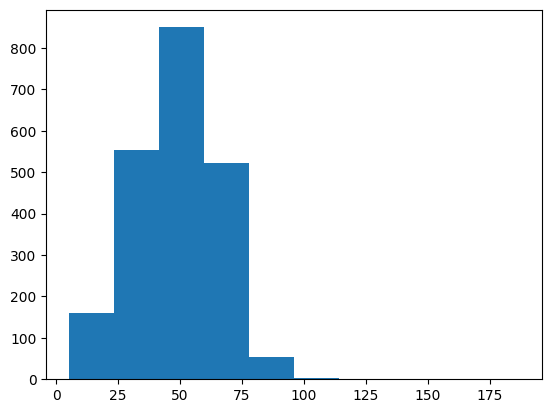

skewness : 0.2788884928260135 - Right Skewed


In [ ]:
plt.hist(data['PM10'])
plt.show()
skewness = data['PM10'].skew()
if skewness > 0:
    print(f"skewness : {skewness} - Right Skewed")
elif skewness < 0:
    print(f"skewness : {skewness} - Left Skewed")
else:
    print(f"skewness : {skewness} - Normal")

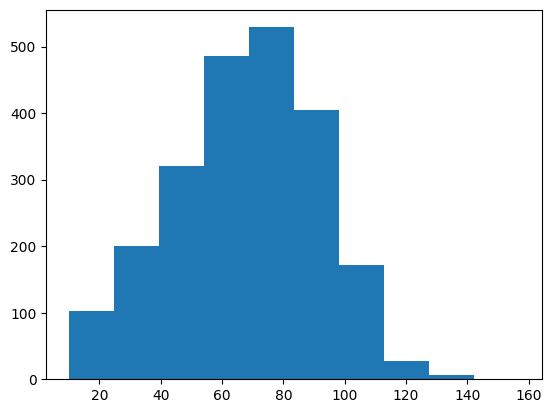

skewness : -0.1525317321983195 - Left Skewed


In [ ]:
plt.hist(data['PM25'])
plt.show()
skewness = data['PM25'].skew()
if skewness > 0:
    print(f"skewness : {skewness} - Right Skewed")
elif skewness < 0:
    print(f"skewness : {skewness} - Left Skewed")
else:
    print(f"skewness : {skewness} - Normal")

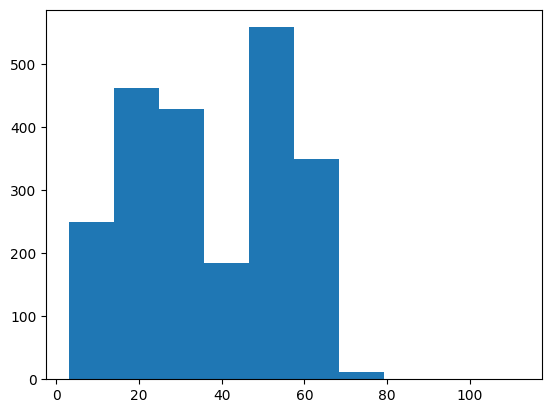

skewness : 0.022033776399968102 - Right Skewed


In [ ]:
plt.hist(data['SO2'])
plt.show()
skewness = data['SO2'].skew()
if skewness > 0:
    print(f"skewness : {skewness} - Right Skewed")
elif skewness < 0:
    print(f"skewness : {skewness} - Left Skewed")
else:
    print(f"skewness : {skewness} - Normal")

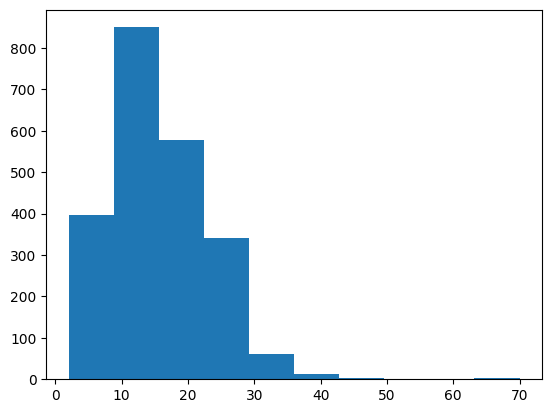

skewness : 0.9347441588029317 - Right Skewed


In [ ]:
plt.hist(data['CO'])
plt.show()
skewness = data['CO'].skew()
if skewness > 0:
    print(f"skewness : {skewness} - Right Skewed")
elif skewness < 0:
    print(f"skewness : {skewness} - Left Skewed")
else:
    print(f"skewness : {skewness} - Normal")

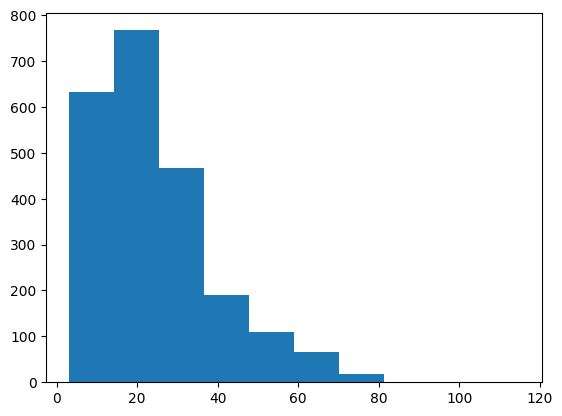

skewness : 1.2640374307409818 - Right Skewed


In [ ]:
plt.hist(data['O3'])
plt.show()
skewness = data['O3'].skew()
if skewness > 0:
    print(f"skewness : {skewness} - Right Skewed")
elif skewness < 0:
    print(f"skewness : {skewness} - Left Skewed")
else:
    print(f"skewness : {skewness} - Normal")

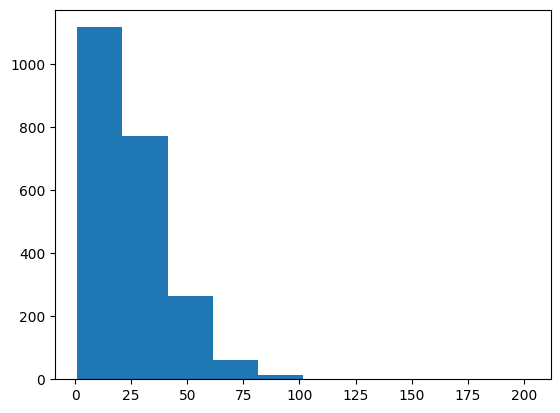

skewness : 1.9362884859193397 - Right Skewed


In [ ]:
plt.hist(data['NO2'])
plt.show()
skewness = data['NO2'].skew()
if skewness > 0:
    print(f"skewness : {skewness} - Right Skewed")
elif skewness < 0:
    print(f"skewness : {skewness} - Left Skewed")
else:
    print(f"skewness : {skewness} - Normal")

**Ditemui data pada kolom PM10, PM25, SO2, CO, O3, NO2 berdistribusi tidak normal (skewness)**

Sehingga kami mengatasinya dengan mengganti data NA/missing value dengan nilai median.

In [ ]:
# Kolom target
target_cols = ['PM10', 'PM25', 'SO2', 'CO', 'O3', 'NO2']

# 1. Mengisi NaN dengan median masing-masing kolom
for col in target_cols:
    median_val = data[col].median()
    data[col] = data[col].fillna(median_val)

# 2. Menambahkan kolom 'max' dengan nilai maksimum per baris dari kolom target
data['max'] = data[target_cols].max(axis=1)

# 3. Menambahkan kolom 'critical' dengan nama kolom yang nilainya maksimum
data['critical'] = data[target_cols].idxmax(axis=1)

In [ ]:
data.isna().sum()

tahun       0
bulan       0
hari        0
stasiun     0
PM10        0
PM25        0
SO2         0
CO          0
O3          0
NO2         0
max         0
critical    0
categori    0
dtype: int64

##**Mengecek Data Outlier**

Karena sebagian besar atribut dataset berdistribusi tidak normal (skewness) kami mengecek outlier berdasarkan batas IQR.

In [ ]:
def detect_outliers_iqr(data):
    outlier_count = {}
    numeric_cols = data.select_dtypes(include='number').columns

    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outlier_count[col] = outliers.shape[0]

    return outlier_count

outlier_counts = detect_outliers_iqr(data)
print(outlier_counts)


{'tahun': 428, 'bulan': 0, 'hari': 0, 'PM10': 8, 'PM25': 4, 'SO2': 1, 'CO': 16, 'O3': 108, 'NO2': 61, 'max': 10}


In [ ]:
# Daftar kolom yang ingin di-winsorize
outlier_columns = ['PM10', 'PM25', 'SO2', 'CO', 'O3', 'NO2', 'max']

# Terapkan winsorize pada setiap kolom dan simpan dalam kolom baru (opsional)
for col in outlier_columns:
    # Terapkan winsorize dengan batas 0,5% bawah dan atas
    data[col] = winsorize(data[col], limits=[0.05, 0.05])

In [ ]:
outlier_counts = detect_outliers_iqr(data)
print(outlier_counts)

{'tahun': 428, 'bulan': 0, 'hari': 0, 'PM10': 0, 'PM25': 0, 'SO2': 0, 'CO': 0, 'O3': 0, 'NO2': 0, 'max': 0}


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask'

###**Merubah Tipe Data**

In [ ]:
data.dtypes

tahun         int64
bulan         int64
hari          int64
stasiun      object
PM10        float64
PM25        float64
SO2         float64
CO          float64
O3          float64
NO2         float64
max         float64
critical     object
categori     object
dtype: object

In [ ]:
data['PM10'] = data['PM10'].replace('---', pd.NA).astype('int')
data['PM25'] = data['PM25'].replace('---', pd.NA).astype('int')
data['SO2'] = data['SO2'].replace('---', pd.NA).astype('int')
data['CO'] = data['CO'].replace('---', pd.NA).astype('int')
data['O3'] = data['O3'].replace('---', pd.NA).astype('int')
data['NO2'] = data['NO2'].replace('---', pd.NA).astype('int')
data['max'] = data['max'].replace('---', pd.NA).astype('int')
data[['PM10', 'PM25', 'SO2', 'CO', 'O3','NO2']].dtypes

PM10    int64
PM25    int64
SO2     int64
CO      int64
O3      int64
NO2     int64
dtype: object

In [ ]:
data['tanggal'] = data['tahun'].astype(str) + '-' + \
                        data['bulan'].astype(str).str.zfill(2) + '-' + \
                        data['hari'].astype(str).str.zfill(2)

data['tanggal'] = pd.to_datetime(data['tanggal'], format='%Y-%m-%d')
del data['tahun']
del data['bulan']
del data['hari']

##**Encoder Value Atribut**

In [ ]:
critictype = {
    'PM10': 1,
    'PM25': 2,
    'SO2': 3,
    'CO': 4,
    'O3': 5,
    'NO2': 6
}

data['critical'] = data['critical'].replace(critictype).astype('int')

<ipython-input-22-7e1690443f1d>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['critical'] = data['critical'].replace(critictype).astype('int')


In [ ]:
data['categori'].unique()

array(['SEDANG', 'BAIK', 'TIDAK SEHAT', 'SANGAT TIDAK SEHAT'],
      dtype=object)

In [ ]:
categories = [['SANGAT TIDAK SEHAT','TIDAK SEHAT', 'SEDANG', 'BAIK']]

encoder = OrdinalEncoder(categories=categories)

# Ubah kolom critical menjadi 1–5
data['categories'] = encoder.fit_transform(data[['categori']]) + 1

In [ ]:
data['categories'] = data['categories'].astype('int')

##**Mengecek Data Duplicate**

In [ ]:
duplicates = data.duplicated()
data[duplicates]

Empty DataFrame
Columns: [stasiun, PM10, PM25, SO2, CO, O3, NO2, max, critical, categori, tanggal, categories]
Index: []

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2269 entries, 0 to 2279
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   stasiun     2269 non-null   object        
 1   PM10        2269 non-null   int64         
 2   PM25        2269 non-null   int64         
 3   SO2         2269 non-null   int64         
 4   CO          2269 non-null   int64         
 5   O3          2269 non-null   int64         
 6   NO2         2269 non-null   int64         
 7   max         2269 non-null   int64         
 8   critical    2269 non-null   int64         
 9   categori    2269 non-null   object        
 10  tanggal     2269 non-null   datetime64[ns]
 11  categories  2269 non-null   int64         
dtypes: datetime64[ns](1), int64(9), object(2)
memory usage: 230.4+ KB


In [ ]:
del data["stasiun"]
del data["tanggal"]

In [ ]:
data.head(5)

PM10  PM25  SO2  CO  O3  NO2  max  critical categori  categories
0    51    65   45   9   8   56   79         6   SEDANG           3
1    27    34   45   5   8   56   56         6   SEDANG           3
2    51    52   46   6   9   51   52         2   SEDANG           3
3    46    65   46   8   9   38   65         2   SEDANG           3
4    37    55   47   7  11   28   55         2   SEDANG           3

#**Data Visualization**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2269 entries, 0 to 2279
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   stasiun     2269 non-null   object        
 1   PM10        2269 non-null   int64         
 2   PM25        2269 non-null   int64         
 3   SO2         2269 non-null   int64         
 4   CO          2269 non-null   int64         
 5   O3          2269 non-null   int64         
 6   NO2         2269 non-null   int64         
 7   max         2269 non-null   int64         
 8   critical    2269 non-null   int64         
 9   categori    2269 non-null   object        
 10  tanggal     2269 non-null   datetime64[ns]
 11  categories  2269 non-null   int64         
dtypes: datetime64[ns](1), int64(9), object(2)
memory usage: 230.4+ KB


##**Summary informasi statistik dataset**

In [ ]:
data.describe()

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask'

PM10         PM25          SO2           CO           O3  \
count  2269.000000  2269.000000  2269.000000  2269.000000  2269.000000   
mean     48.744381    67.868665    37.156016    15.371529    24.215513   
min      21.000000    26.000000    12.000000     5.000000     8.000000   
25%      37.000000    53.000000    22.000000    10.000000    14.000000   
50%      51.000000    69.000000    35.000000    14.000000    21.000000   
75%      60.000000    85.000000    55.000000    21.000000    31.000000   
max      74.000000   104.000000    62.000000    28.000000    55.000000   
std      14.896967    21.890227    17.483108     6.764422    13.083634   

               NO2          max     critical                        tanggal  \
count  2269.000000  2269.000000  2269.000000                           2269   
mean     24.739533    70.969149     2.137065  2024-08-12 12:55:31.864257536   
min       6.000000    38.000000     1.000000            2024-01-01 00:00:00   
25%      14.000000    56.000000     2.000000            2024-04-20 00:00:00   
50%      21.000000    70.000000     2.000000            2024-08-12 00:00:00   
75%      34.000000    85.000000     2.000000            2024-12-04 00:00:00   
max      56.000000   105.000000     6.000000            2025-03-31 00:00:00   
std      14.046143    18.505348     0.791927                            NaN   

        categories  
count  2269.000000  
mean      3.072279  
min       1.000000  
25%       3.000000  
50%       3.000000  
75%       3.000000  
max       4.000000  
std       0.477051

##**Bar Chart : Jumlah baris data pada setiap categori**

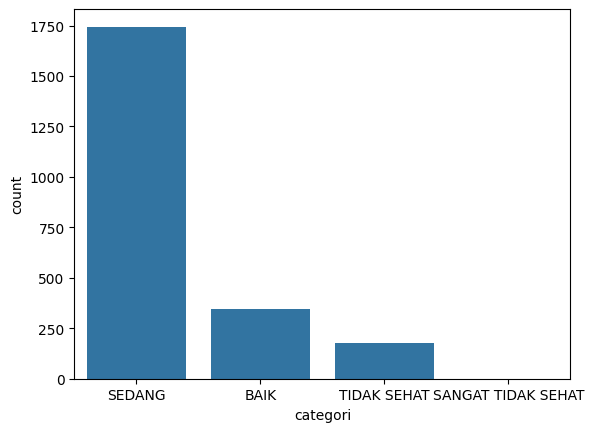

In [ ]:
sns.countplot(x='categori', data=data)
plt.show()

In [ ]:
data['categori'].value_counts()

##**Scatter Plot : Hubungan pasangan antar variabel dalam dataset secara menyeluruh**

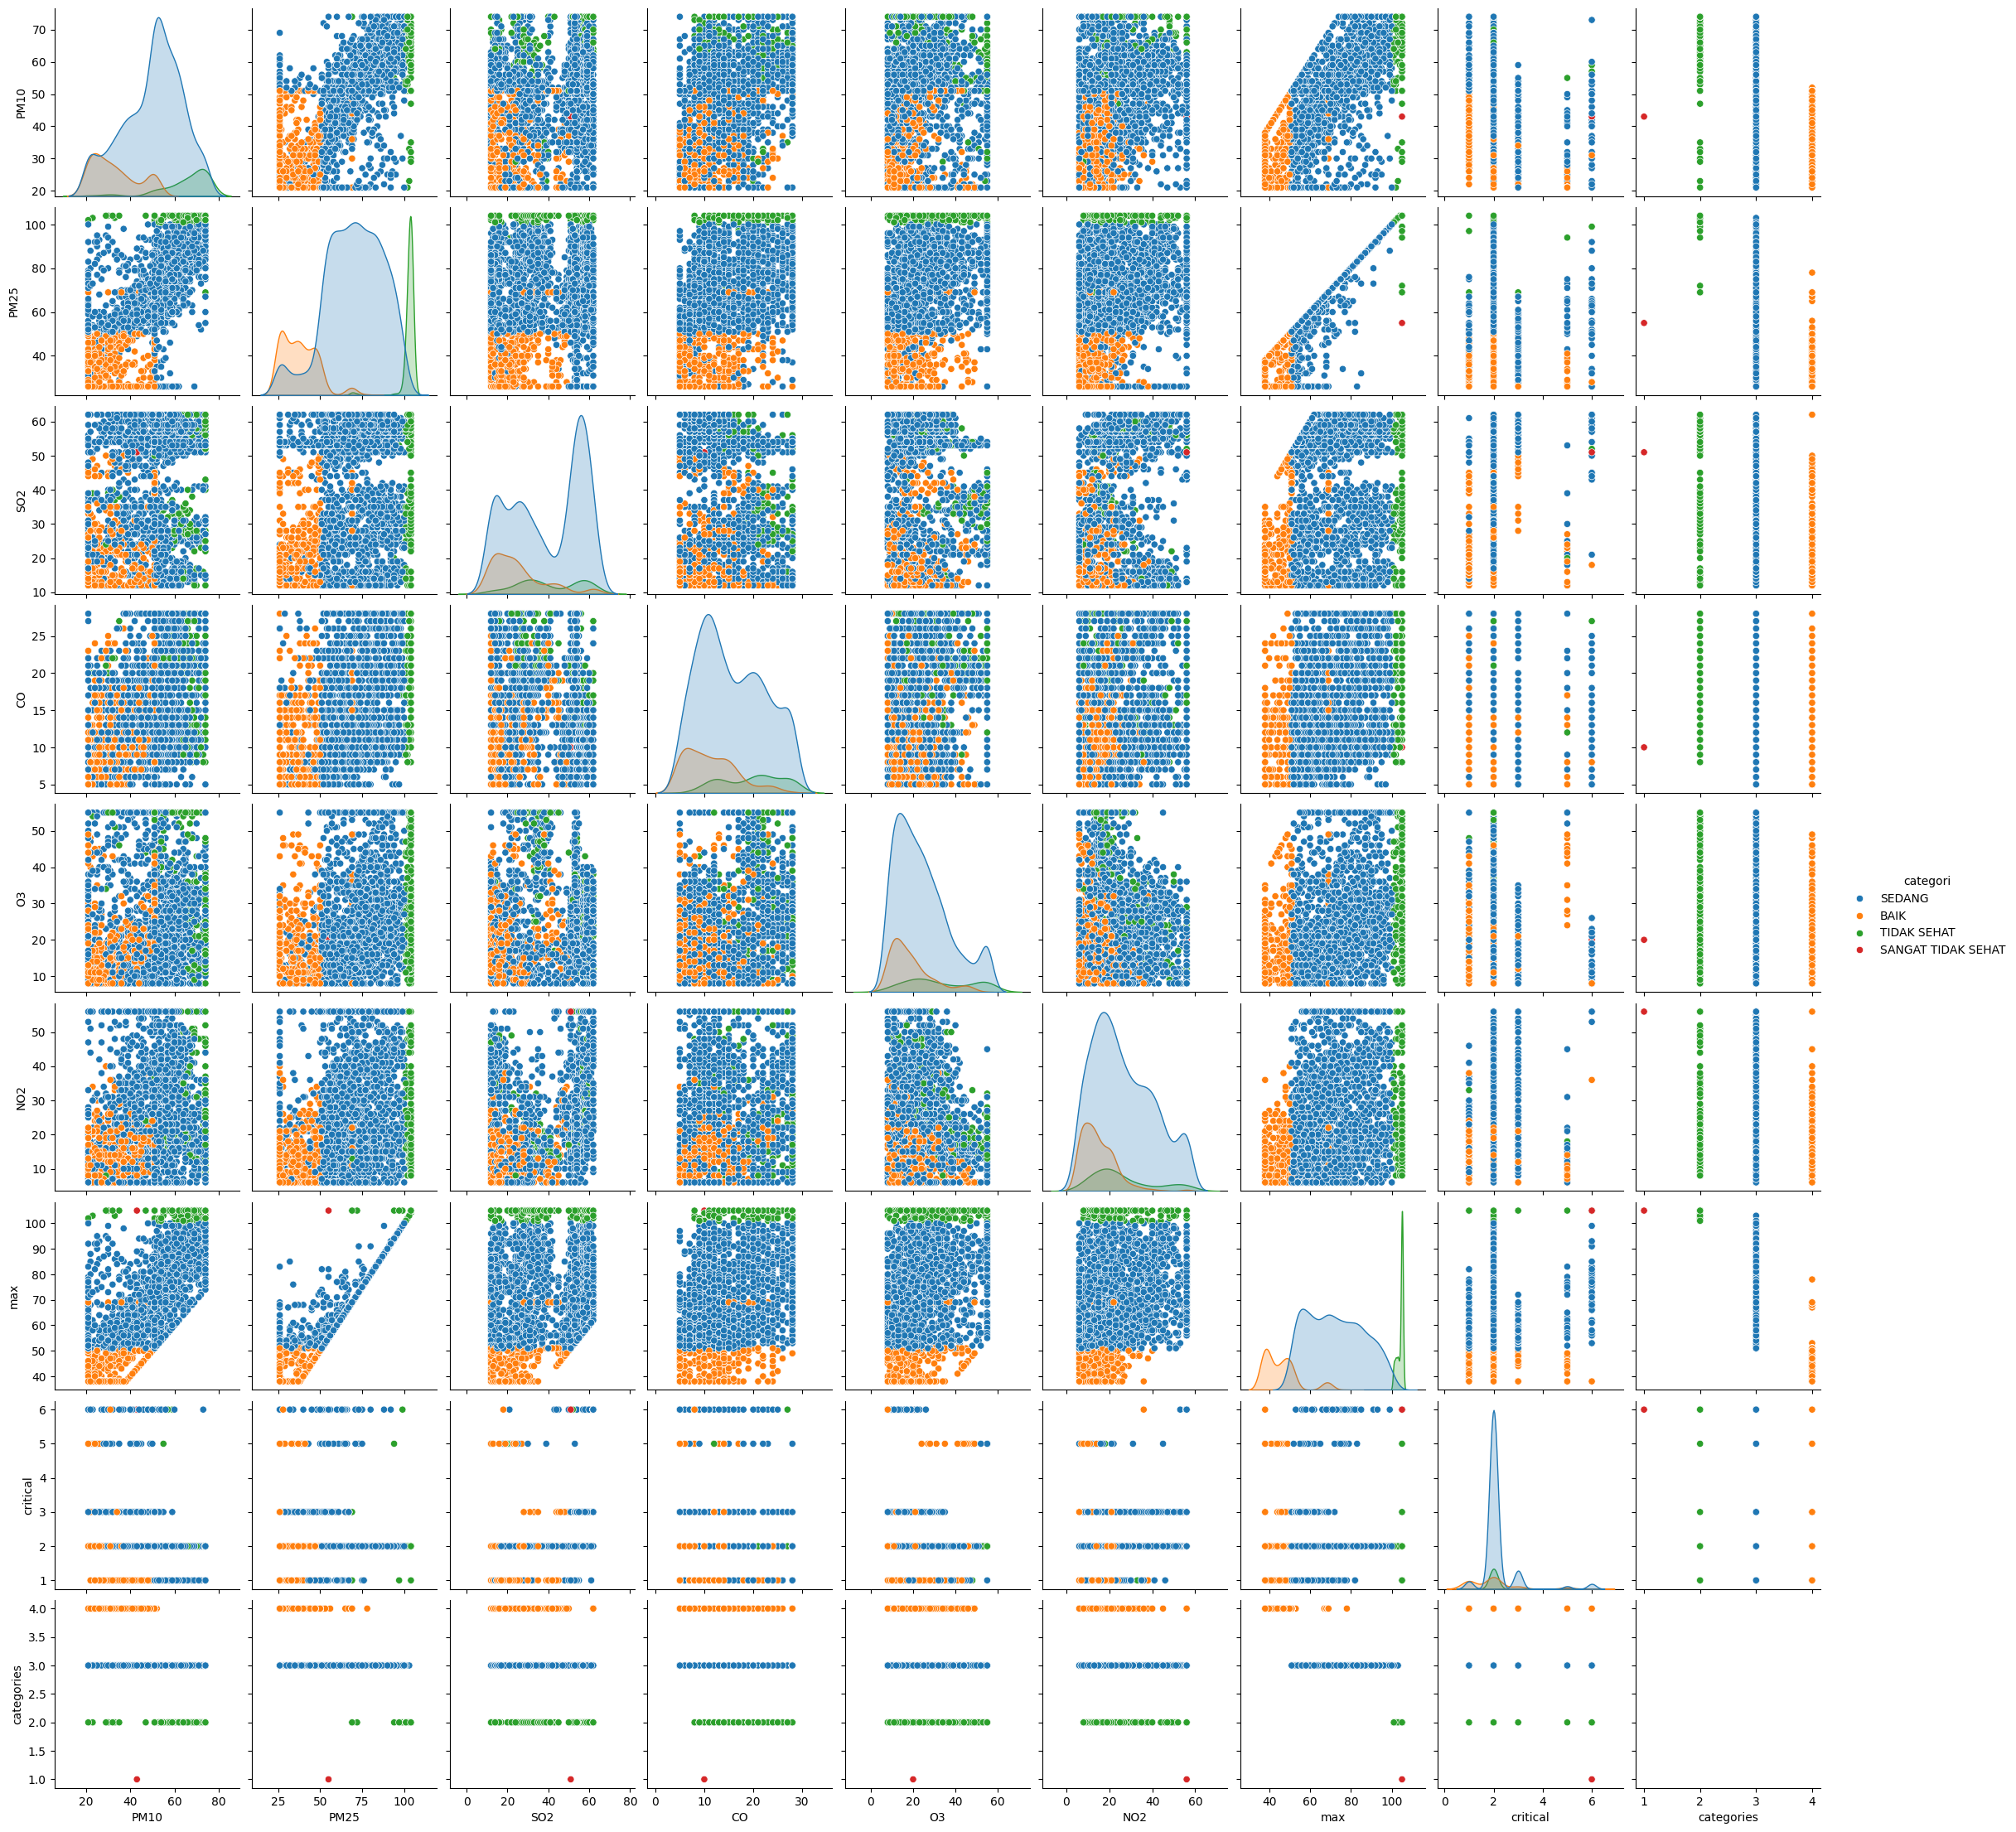

In [ ]:
sns.pairplot(data,hue='categori')
plt.show()

##**Histogram : Distribusi data categori**

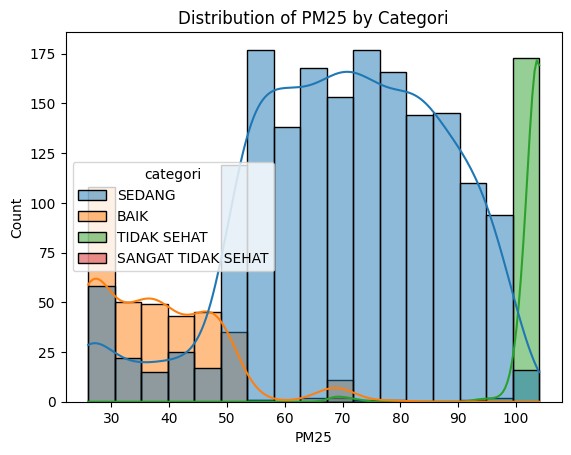

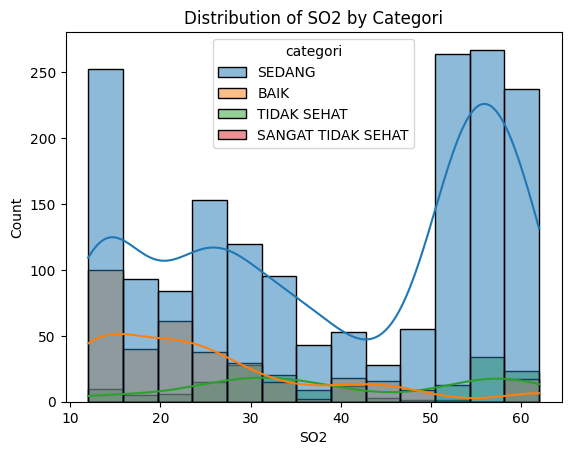

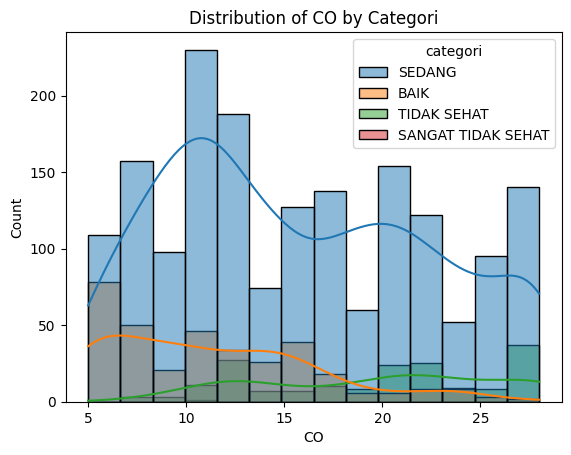

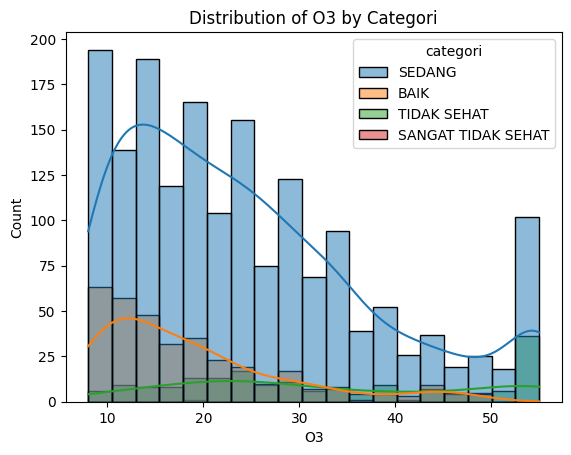

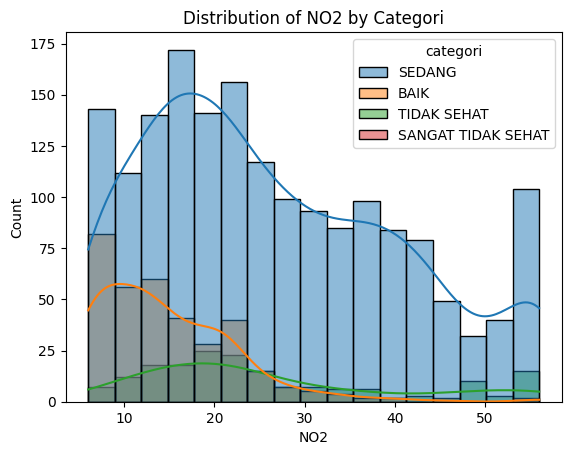

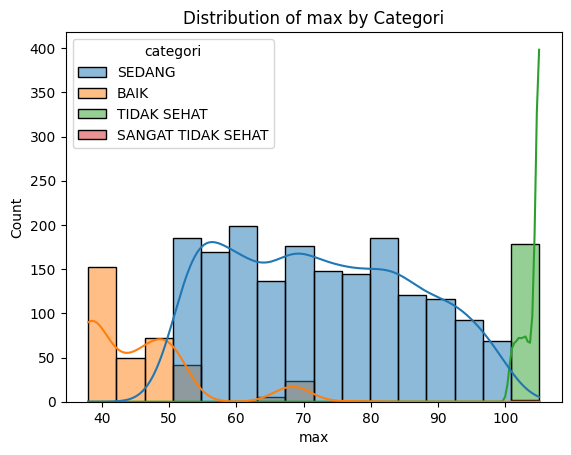

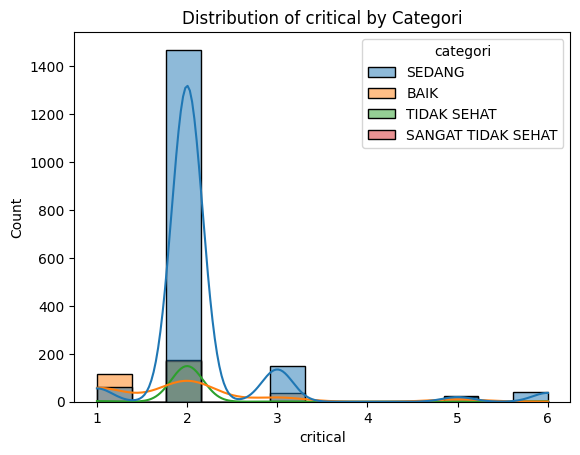

In [ ]:
col = list(data)
col=col[1:9]
for i in col:
    # Check if the column is numerical before plotting a histogram
    if pd.api.types.is_numeric_dtype(data[i]):
        # Create a new figure for each plot
        plt.figure()
        sns.histplot(data=data, x=i, hue='categori', kde=True)
        plt.title(f'Distribution of {i} by Categori')
        plt.show()

In [ ]:
data.columns

Index(['stasiun', 'PM10', 'PM25', 'SO2', 'CO', 'O3', 'NO2', 'max', 'critical',
       'categori', 'tanggal', 'categories'],
      dtype='object')

In [ ]:
data.dtypes

stasiun               object
PM10                   int64
PM25                   int64
SO2                    int64
CO                     int64
O3                     int64
NO2                    int64
max                    int64
critical               int64
categori              object
tanggal       datetime64[ns]
categories             int64
dtype: object

#**Split Data Training dan Testing**

In [ ]:
data.columns

Index(['stasiun', 'PM10', 'PM25', 'SO2', 'CO', 'O3', 'NO2', 'max', 'critical',
       'categori', 'tanggal', 'categories'],
      dtype='object')

In [ ]:
# Define features and target
X = data[['PM10', 'PM25', 'SO2', 'CO', 'O3', 'NO2','critical','max']]
y = data['categories']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Beberapa Percobaan Model Logit Ordinal**

##**Probit Ordinal**

In [ ]:
modProbit = OrderedModel(y_train,
                        X_train,
                        distr='probit').fit(method='bfgs')
print(modProbit.summary())

# Predict probabilities for test data
pred_probs = modProbit.predict(X_test)

# Assign the category with the highest probability
y_pred = pred_probs.idxmax(axis=1)

# Evaluate performance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Optimization terminated successfully.
         Current function value: 0.220953
         Iterations: 50
         Function evaluations: 55
         Gradient evaluations: 55
                             OrderedModel Results                             
Dep. Variable:             categories   Log-Likelihood:                -401.03
Model:                   OrderedModel   AIC:                             824.1
Method:            Maximum Likelihood   BIC:                             884.6
Date:                Sat, 31 May 2025                                         
Time:                        14:22:48                                         
No. Observations:                1815                                         
Df Residuals:                    1804                                         
Df Model:                           8                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

##**Logit Model**

In [ ]:
modLogit = OrderedModel(data['categories'],
                        data[['PM10', 'PM25', 'SO2', 'O3', 'NO2','critical']],
                        distr='logit').fit(method='bfgs', disp=False)
print(modLogit.summary())

# Predict probabilities for test data
pred_probs = modProbit.predict(X_test)

# Assign the category with the highest probability
y_pred = pred_probs.idxmax(axis=1)

# Evaluate performance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                             OrderedModel Results                             
Dep. Variable:             categories   Log-Likelihood:                -626.39
Model:                   OrderedModel   AIC:                             1271.
Method:            Maximum Likelihood   BIC:                             1322.
Date:                Sat, 31 May 2025                                         
Time:                        14:23:22                                         
No. Observations:                2269                                         
Df Residuals:                    2260                                         
Df Model:                           6                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
PM10          -0.0662      0.008     -8.211      0.000      -0.082      -0.050
PM25          -0.1646      0.008    -20.580      0.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

##**CLogLog Model**

In [ ]:
modClog = OrderedModel(data['categories'],
                        data[['PM10', 'PM25', 'SO2', 'O3', 'NO2','critical']],
                           distr=stats.expon).fit(method='bfgs', disp=False)
print(modClog.summary())

# Predict probabilities for test data
pred_probs = modProbit.predict(X_test)

# Assign the category with the highest probability
y_pred = pred_probs.idxmax(axis=1)

# Evaluate performance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                             OrderedModel Results                             
Dep. Variable:             categories   Log-Likelihood:                -852.02
Model:                   OrderedModel   AIC:                             1722.
Method:            Maximum Likelihood   BIC:                             1774.
Date:                Sat, 31 May 2025                                         
Time:                        14:26:54                                         
No. Observations:                2269                                         
Df Residuals:                    2260                                         
Df Model:                           6                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
PM10          -0.0164        nan        nan        nan         nan         nan
PM25          -0.0464        nan        nan        n

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _war

##**Ordinal Ridge**

Akurasi: 0.9251101321585903
              precision    recall  f1-score   support

           2       0.97      0.82      0.89        38
           3       0.93      0.98      0.95       347
           4       0.88      0.72      0.79        69

    accuracy                           0.93       454
   macro avg       0.92      0.84      0.88       454
weighted avg       0.92      0.93      0.92       454



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but OrdinalRidge was fitted without feature names
  warnings.warn(


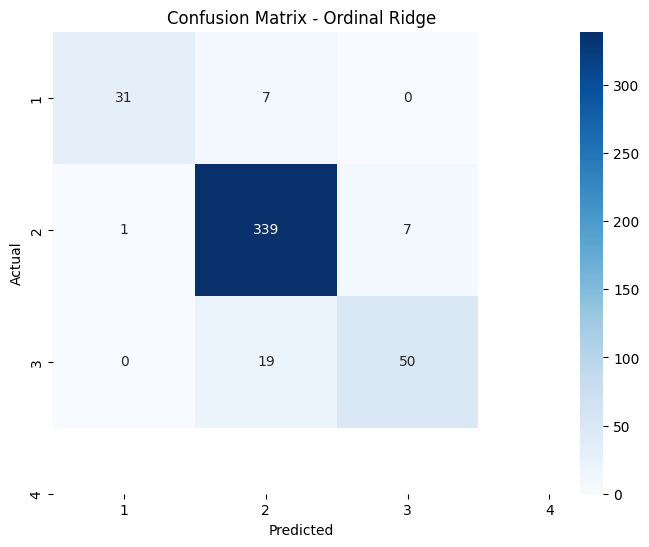

In [ ]:
model = OrdinalRidge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))

# Evaluate performance
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Visualisasikan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Ordinal Ridge")
plt.show()

##**LogisticAT (All-Threshold)**

Akurasi: 0.9823788546255506
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        38
           3       0.98      1.00      0.99       347
           4       0.98      0.90      0.94        69

    accuracy                           0.98       454
   macro avg       0.99      0.97      0.98       454
weighted avg       0.98      0.98      0.98       454



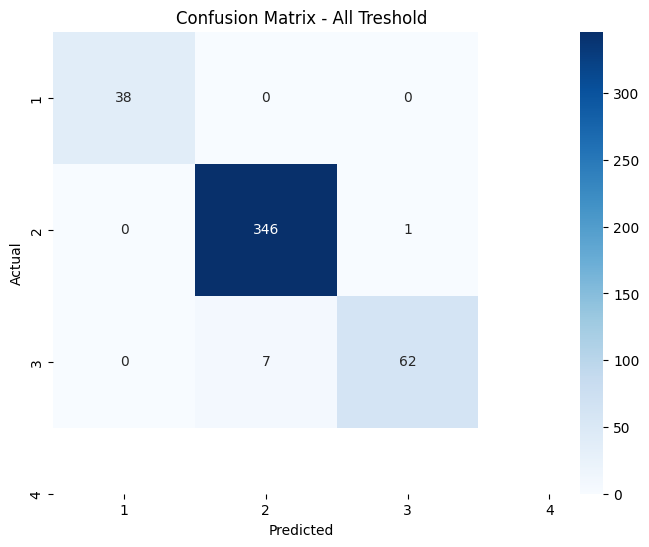

In [ ]:
model = LogisticAT()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))

# Evaluate performance
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Visualisasikan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - All Treshold")
plt.show()

##**LogisticIT (Immediate Threshold)**

Akurasi: 0.9823788546255506
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        38
           3       0.98      1.00      0.99       347
           4       0.98      0.90      0.94        69

    accuracy                           0.98       454
   macro avg       0.99      0.97      0.98       454
weighted avg       0.98      0.98      0.98       454



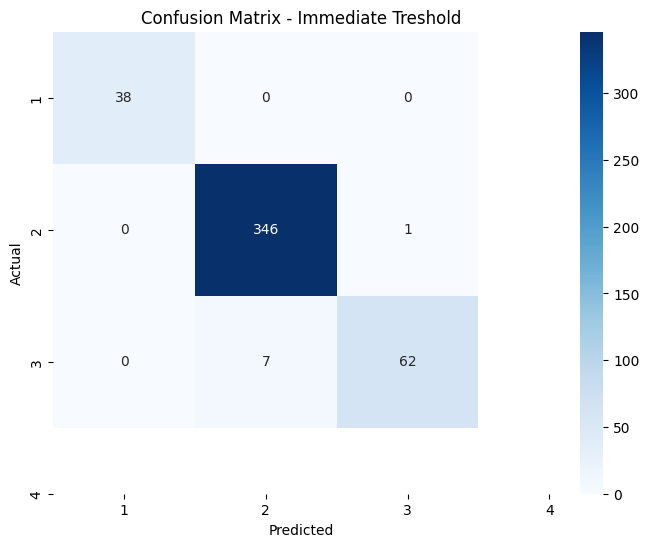

In [ ]:
model = LogisticIT()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))

# Evaluate performance
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Visualisasikan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Immediate Treshold")
plt.show()

##**LogisticSE (Squared Error)**

MSE: 0.024229074889867842
Akurasi: 0.9757709251101322
              precision    recall  f1-score   support

           2       0.97      1.00      0.99        38
           3       0.98      0.99      0.98       347
           4       0.95      0.90      0.93        69

    accuracy                           0.98       454
   macro avg       0.97      0.96      0.97       454
weighted avg       0.98      0.98      0.98       454



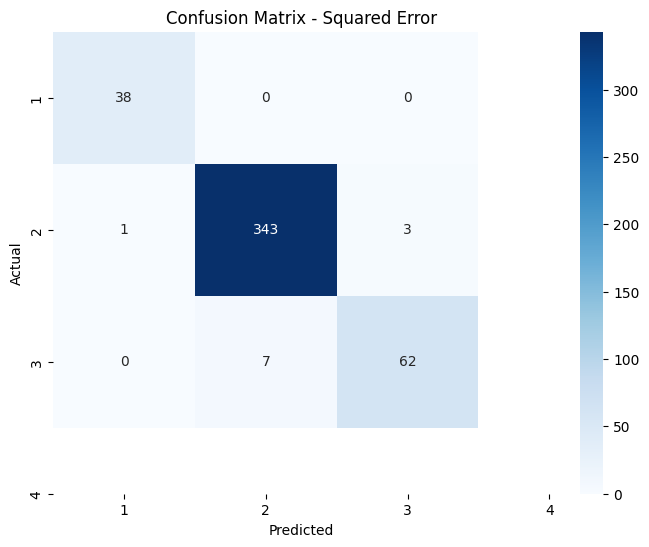

In [ ]:
model = LogisticSE()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("Akurasi:", accuracy_score(y_test, y_pred))

# Evaluate performance
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Visualisasikan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Squared Error")
plt.show()